In [1]:
cat('Last updated ', date())

Last updated  Wed Oct 12 21:51:01 2022

# Clinical Trial Data analysis using R and SAS
### Author : Ding-Geng (Din) Chen , Karl E. Peace, Pinggao Zhang

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book by studying graphs and examples of the book. Additional R code in addition to the book is added if necessary such that a code is not provided.  For detail explanation, refer the book. 

In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

## Chapter 6 Longitudinal Data Analysis for Clinical Trials

In [ ]:
In clinical trials to investigate the effectiveness of a new treatment on an sample of patients, 

### 6.3 Longitudinal Data Analysis for Clinical Trials

#### 6.3.1 Analysis of Diastolic Blood Pressure Data

In [3]:
setwd('C:/Users/shims/Desktop/Bio-Statistics/Clinical Trial Data Analysis')

In [4]:
dat <- read.csv("DBP.csv", header=T)
head(dat)

,Subject,TRT,DBP1,DBP2,DBP3,DBP4,DBP5,Age,Sex
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,A,114,115,113,109,105,43,F
2,2,A,116,113,112,103,101,51,M
3,3,A,119,115,113,104,98,48,F
4,4,A,115,113,112,109,101,42,F
5,5,A,116,112,107,104,105,49,M
6,6,A,117,112,113,104,102,47,M


In [5]:
summary(dat)

    Subject          TRT                 DBP1            DBP2      
 Min.   : 1.00   Length:40          Min.   :114.0   Min.   :111.0  
 1st Qu.:10.75   Class :character   1st Qu.:115.0   1st Qu.:113.0  
 Median :20.50   Mode  :character   Median :116.5   Median :115.0  
 Mean   :20.50                      Mean   :116.7   Mean   :114.3  
 3rd Qu.:30.25                      3rd Qu.:118.0   3rd Qu.:115.0  
 Max.   :40.00                      Max.   :121.0   Max.   :119.0  
      DBP3            DBP4            DBP5            Age       
 Min.   :100.0   Min.   :102.0   Min.   : 97.0   Min.   :38.00  
 1st Qu.:112.0   1st Qu.:106.8   1st Qu.:101.8   1st Qu.:42.00  
 Median :113.0   Median :109.0   Median :106.5   Median :48.00  
 Mean   :112.4   Mean   :109.3   Mean   :106.7   Mean   :47.83  
 3rd Qu.:113.0   3rd Qu.:113.2   3rd Qu.:112.0   3rd Qu.:51.25  
 Max.   :118.0   Max.   :117.0   Max.   :115.0   Max.   :63.00  
     Sex           
 Length:40         
 Class :character  
 Mode  :c

#### Reshape the data into "long" direction

In [6]:
Dat <- reshape(dat, direction="long",
              varying=c("DBP1","DBP2","DBP3","DBP4","DBP5"),
               idvar = c("Subject","TRT","Age","Sex"),sep="")

In [7]:
# rename the variables
colnames(Dat) = c("Subject","TRT","Age","Sex","Time","DBP")

In [8]:
head(Dat)

,Subject,TRT,Age,Sex,Time,DBP
,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1.A.43.F.1,1,A,43,F,1,114
2.A.51.M.1,2,A,51,M,1,116
3.A.48.F.1,3,A,48,F,1,119
4.A.42.F.1,4,A,42,F,1,115
5.A.49.M.1,5,A,49,M,1,116
6.A.47.M.1,6,A,47,M,1,117


Now the data set,_Dat_, is the "long" format, which has all possible combinations of "Subject","TRT","Age","Sex".

#### Figure 6.1: DBP as a Function of Time for Each Patient 

In [9]:
# install.packages('lattice')

In [10]:
library(lattice)

In [11]:
attach(Dat)

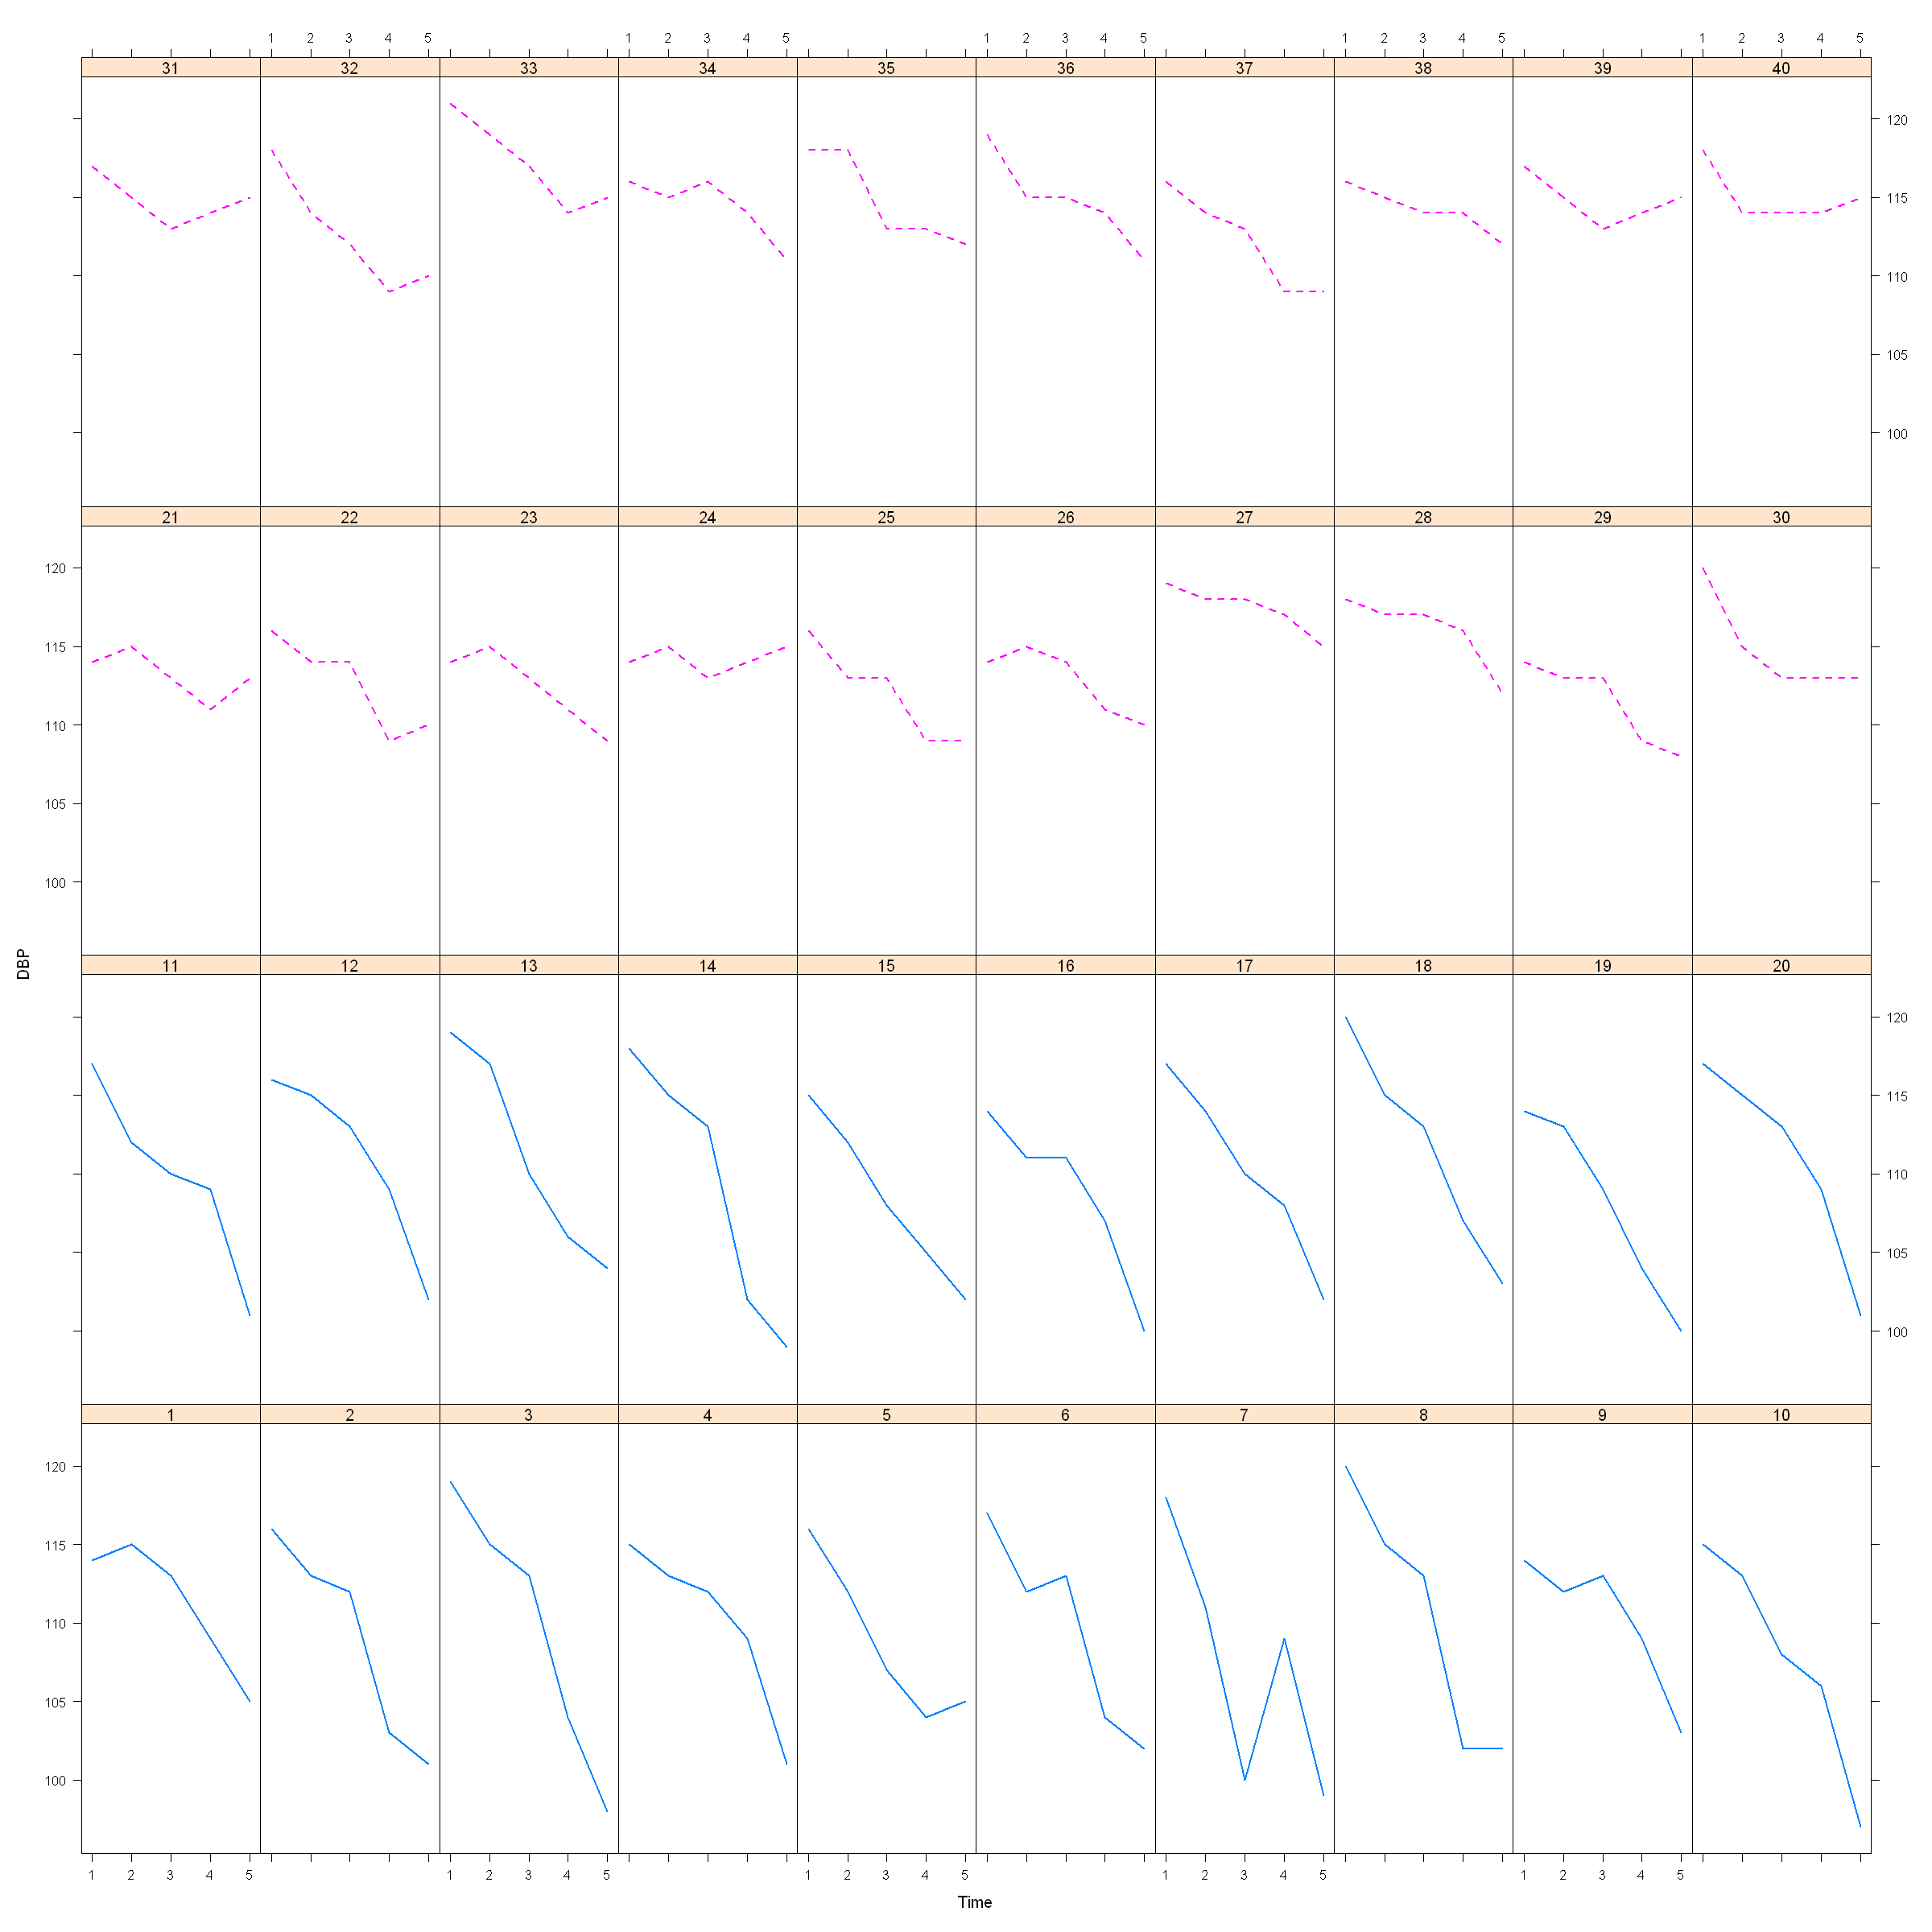

In [12]:
options(repr.plot.width=20, repr.plot.height=20)
print(xyplot(DBP ~ Time|as.factor(Subject), type="l", 
     groups=TRT, lty=c(1,8), lwd=2, layout=c(10,4), Dat))

In this figure, 
* the first 20 patients (from treatment A) are plotted using a solid line. 
* the next 20 patients (from treatment B) are plotted using dashed lines.

#### Figure 6.2: DBP as a Function of Time Grouped for All Patients

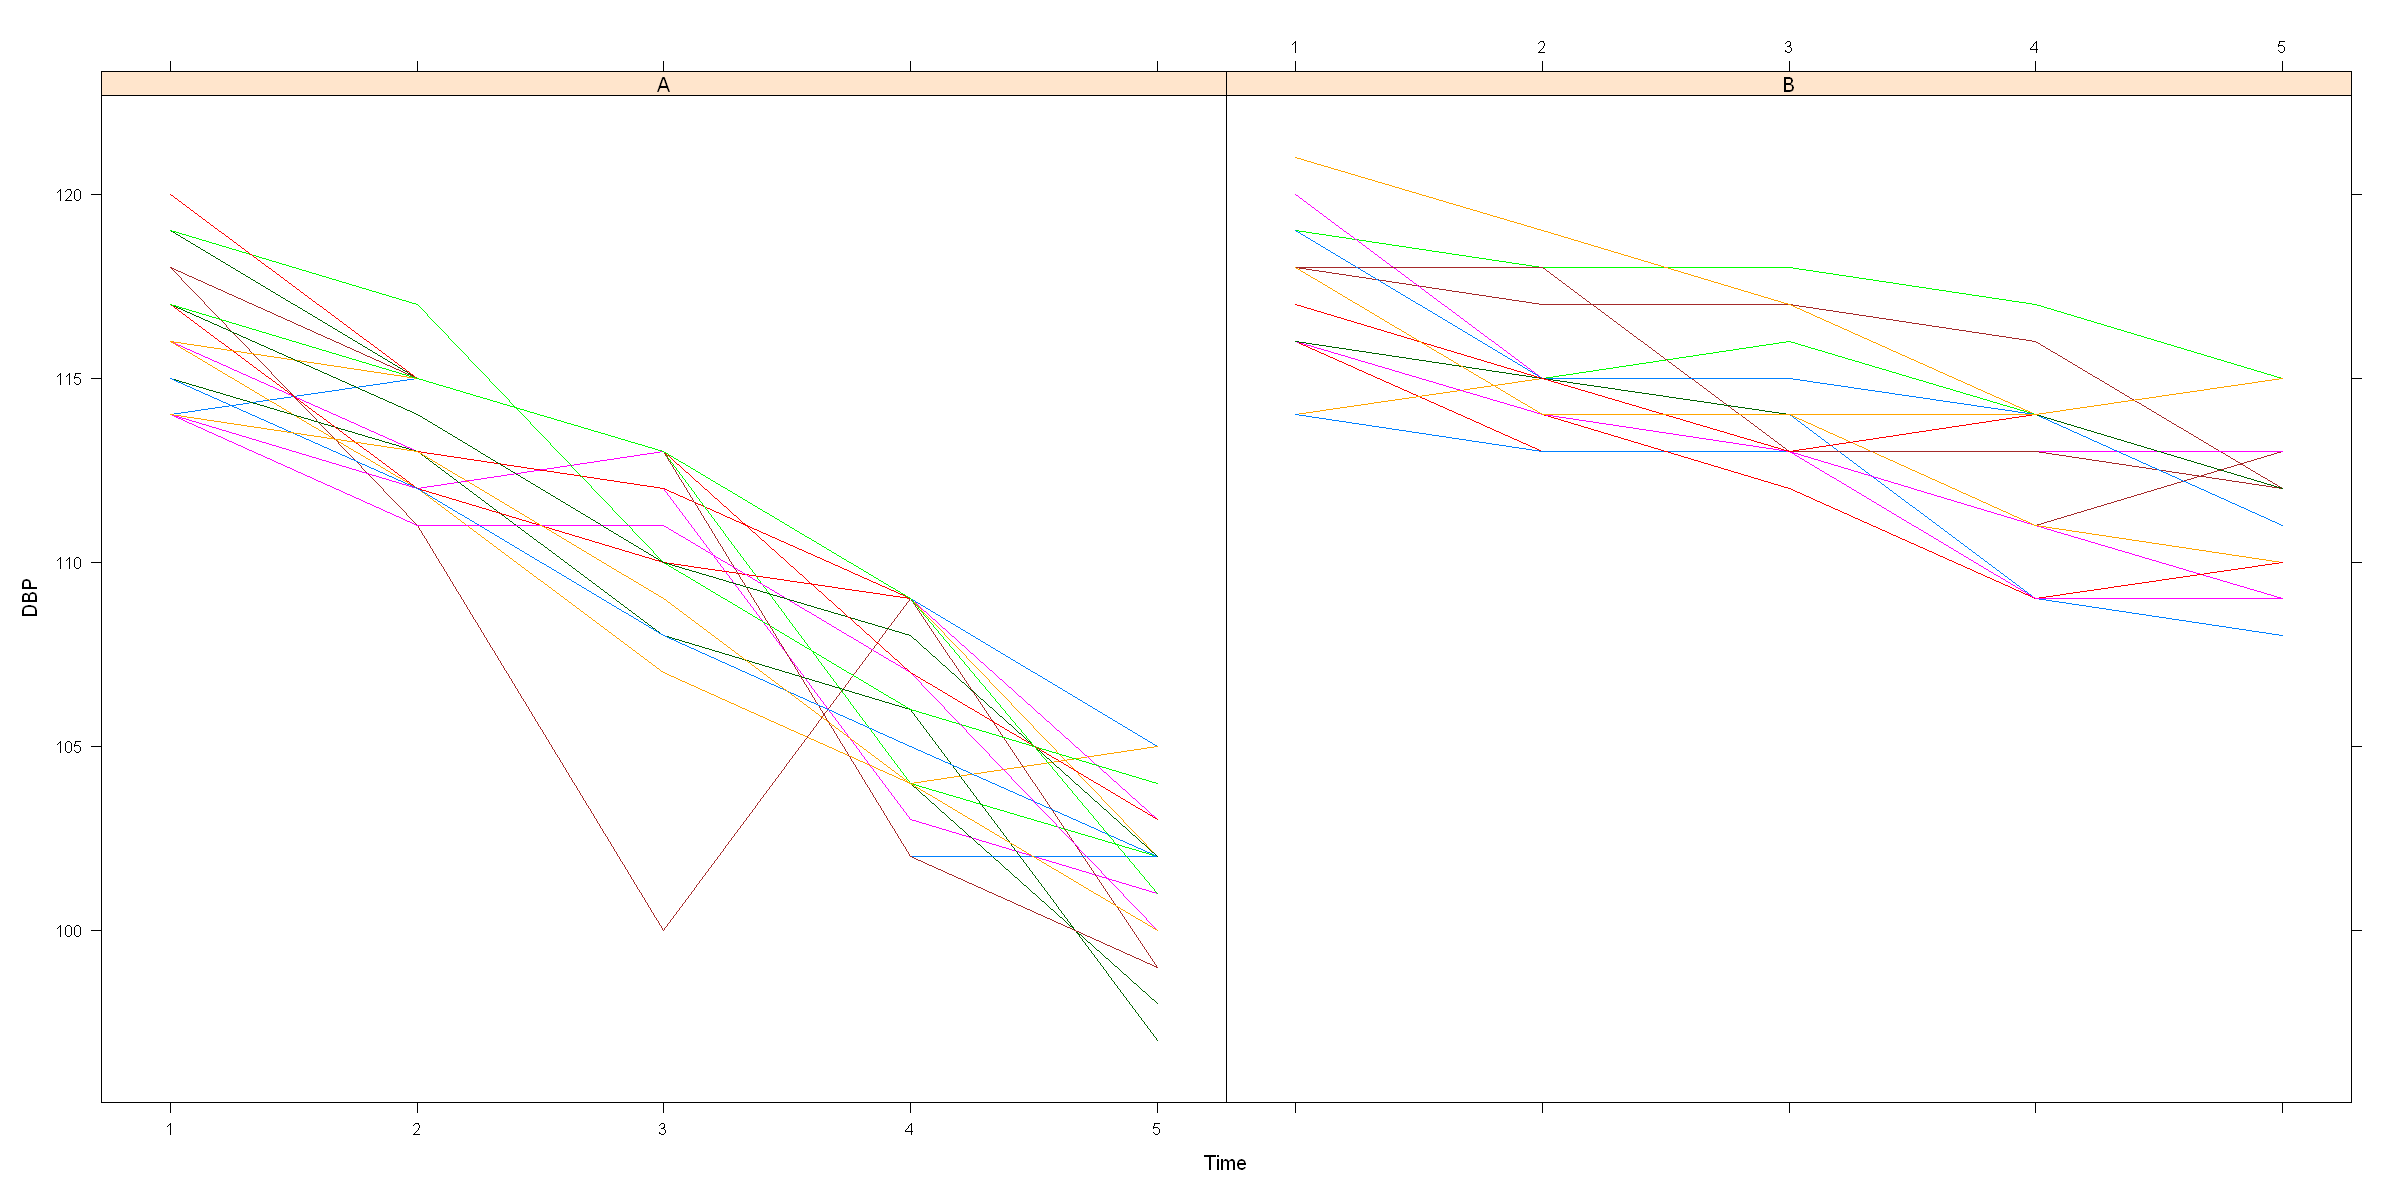

In [13]:
options(repr.plot.width=20, repr.plot.height=10)
print(xyplot(DBP ~ Time|TRT, type="l", Dat, groups=as.factor(Subject)))

We can observe that on average DBP declines at a faster rate in treatment A than in treatment B. Also, the magnitude of the decline in treatment A is greather than in treatment B. However, the 40 patients has different rate and extent of decline.

#### Figure 6.3: Boxplot by Treatments

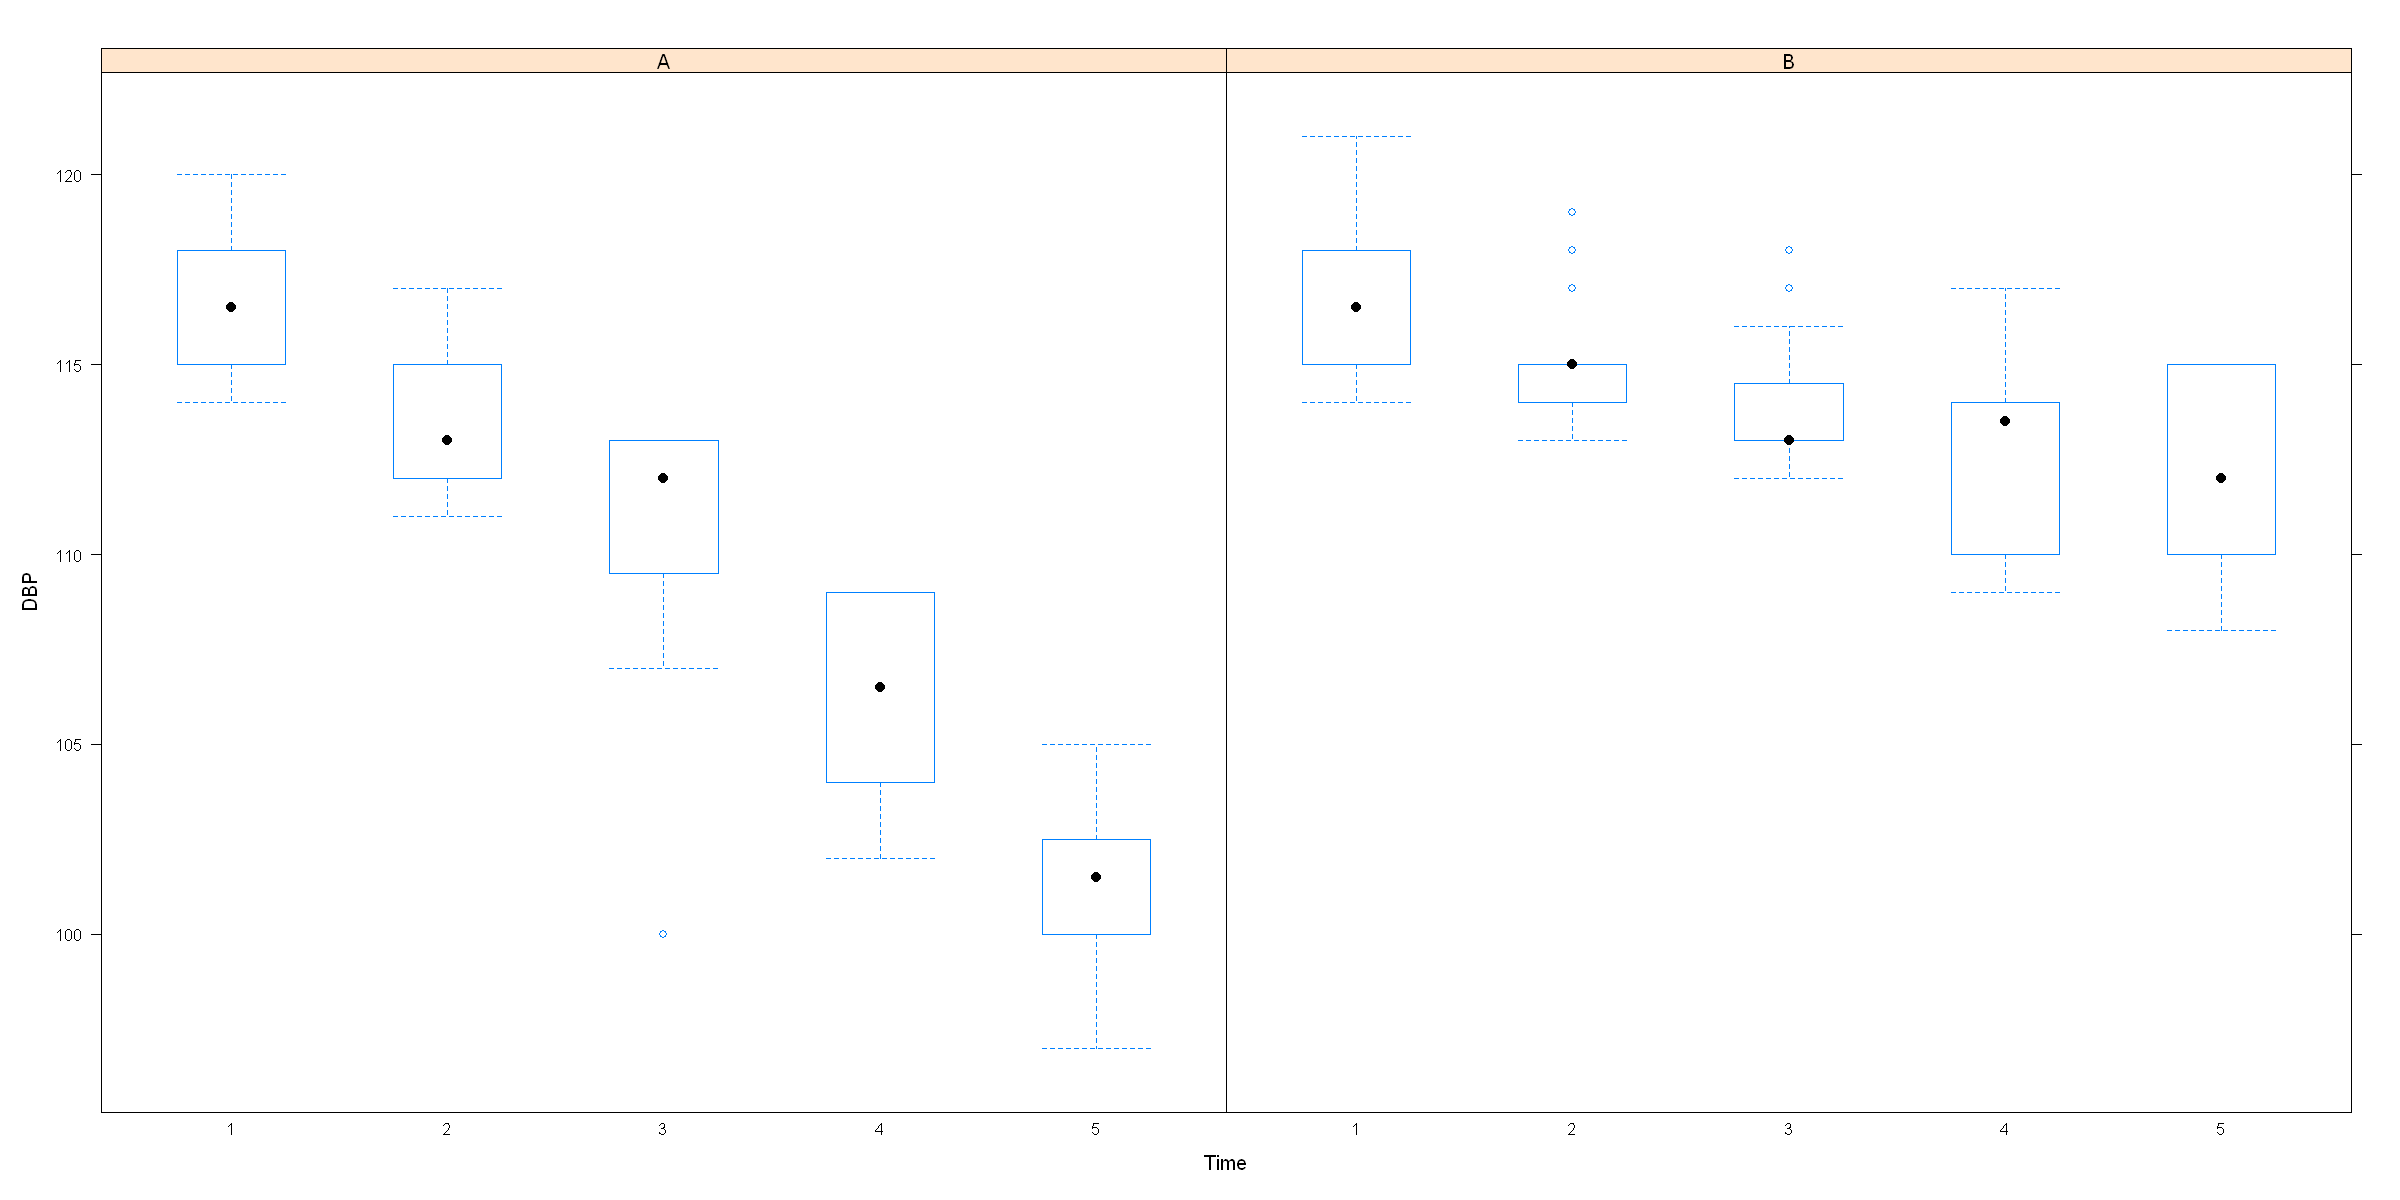

In [14]:
options(repr.plot.width=20, repr.plot.height=10)
print(bwplot(DBP ~ as.factor(Time)|TRT, Dat, xlab='Time'))

Again, we note that the rate and extent of the decline in DBP is greater in treatment group A than in treatment group B. 

#### We now further investigate the declining trend by estimating the slope and intercept for each patient.

We first loop-over the 40 patients to fit linear regressions and then extract the intercepts and slopes to make  a dataframe.

In [15]:
num.Subj <- 40

In [16]:
# initiate the intercept and slope
intercept = slope = numeric(num.Subj)

In [17]:
# loop - over
for (i in 1:num.Subj) { 
    mod <- lm(DBP ~ Time, Dat[Dat$Subject==i,]) # fit regression model
    intercept[i] <- coef(mod)[1] # extract the intercept
    slope[i] <- coef(mod)[2] # extract the slope
}

In [18]:
dat.coef <- data.frame(Subject=dat$Subject, TRT=dat$TRT, Intercept=intercept, Slope=slope)

In [19]:
dat.coef

Subject,TRT,Intercept,Slope
<int>,<chr>,<dbl>,<dbl>
1,A,118.4,-2.4
2,A,121.0,-4.0
3,A,125.7,-5.3
4,A,119.6,-3.2
5,A,117.8,-3.0
6,A,121.0,-3.8
7,A,119.4,-4.0
8,A,125.1,-4.9
9,A,117.7,-2.5


In [20]:
mean(dat.coef$Intercept)
mean(dat.coef$Slope)

[1] 119.375

[1] -2.5

The intercepts vary about 120 mmHg with a lope of about -2.5 mmHg/month.

#### Figure 6.4: Bivariate Plot for Intercept and Slope

We can draw a bivariate plot of the intercept and slope from the 40 patients.

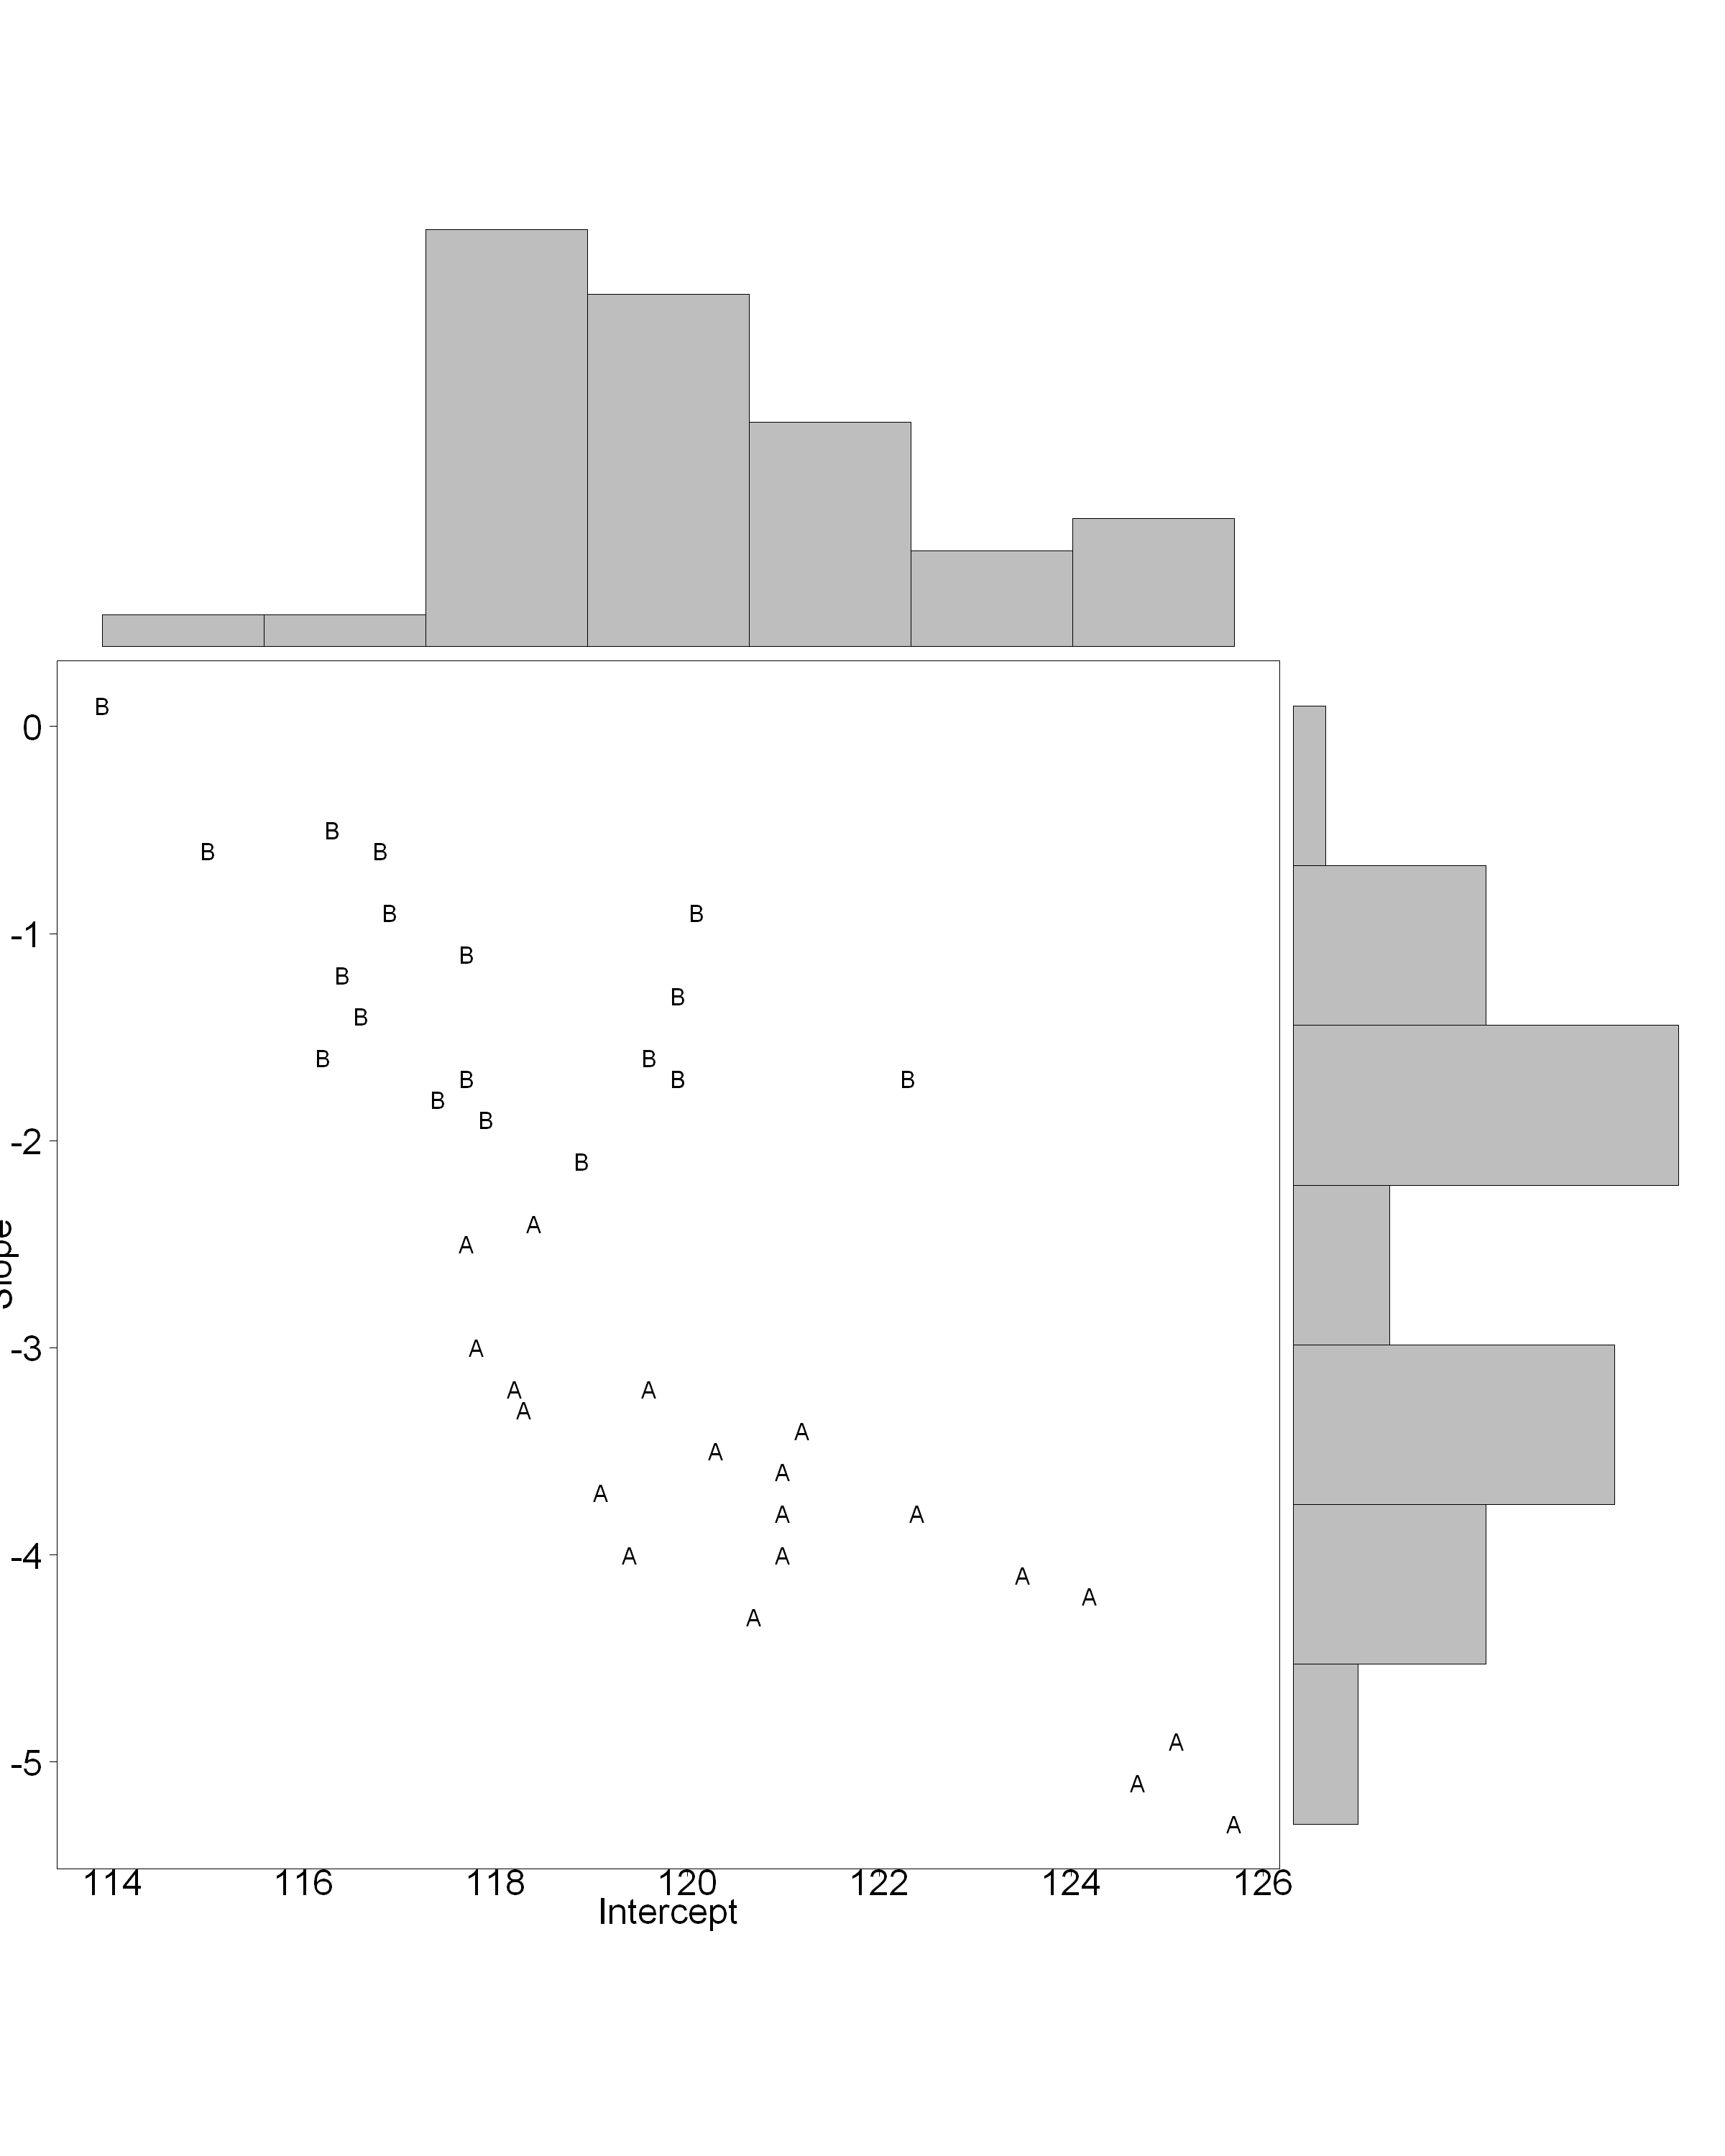

In [31]:
options(repr.plot.width=20, repr.plot.height=25)

# Make histogram for both intercept and slope
int.hist = hist(intercept,plot=F)
slope.hist = hist(slope,plot=F)

# make layout for plotting
top=max(c(int.hist$counts, slope.hist$counts))
nf =layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1),c(1,3),T)
par(mar=c(5,4,1,1))

# plot the intercept and slope
plot(Slope~Intercept,las=1, data=dat.coef,xlab="Intercept",
ylab="Slope",pch=as.character(TRT), cex=2, lwd=2, cex.axis = 3, cex.lab = 3)

par(mar=c(0,4,1,1))
# add the intercept and slope histograms
barplot(int.hist$counts, axes=FALSE,ylim=c(0,top),space=0)
par(mar=c(5,0,1,1))
barplot(slope.hist$counts,axes=FALSE,xlim=c(0,top),
space=0,horiz=TRUE)


We see that the slope of A declines faster than the slope of B. The variations embedded in the intercept and slope illustrate the modeling of random-effects for both intercept and slope.

We now model the slope and intercept relationshps by a linear regression. 

#### Fit model1 with interaction term 

In [32]:
mod1.coef = lm(Slope~Intercept*TRT, dat.coef)
summary(mod1.coef)


Call:
lm(formula = Slope ~ Intercept * TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66359 -0.29475 -0.03143  0.34701  0.75317 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28.33737    4.68741   6.045 6.04e-07 ***
Intercept      -0.26539    0.03874  -6.850 5.17e-08 ***
TRTB           -8.29639    7.37956  -1.124    0.268    
Intercept:TRTB  0.08475    0.06198   1.367    0.180    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4293 on 36 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.9122 
F-statistic: 136.1 on 3 and 36 DF,  p-value: < 2.2e-16


The interaction term Intercept:TRTB is not significantly significant (p-value is 0.268 > $\alpha$=0.05)

#### Fit model 2 without interaction term

In [33]:
mod2.coef = lm(Slope~Intercept+TRT, dat.coef)
summary(mod2.coef)


Call:
lm(formula = Slope ~ Intercept + TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73316 -0.38494  0.02806  0.33483  0.87272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.33216    3.70220   6.572 1.06e-07 ***
Intercept   -0.23228    0.03059  -7.592 4.68e-09 ***
TRTB         1.79136    0.16831  10.643 8.16e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4343 on 37 degrees of freedom
Multiple R-squared:  0.9147,	Adjusted R-squared:  0.9101 
F-statistic: 198.5 on 2 and 37 DF,  p-value: < 2.2e-16


From model2, two tretments are significantly different (TRT B). Further analysis of the difference between treatments are performed using the t-test.

In [35]:
#test slope difference
t.test(Slope ~ TRT, dat.coef)


	Welch Two Sample t-test

data:  Slope by TRT
t = -11.673, df = 35.556, p-value = 1.019e-13
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -2.96976 -2.09024
sample estimates:
mean in group A mean in group B 
         -3.765          -1.235 


In [36]:
#test Intercept difference
t.test(Intercept ~ TRT, dat.coef)


	Welch Two Sample t-test

data:  Intercept by TRT
t = 4.3669, df = 36.266, p-value = 0.0001008
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 1.703495 4.656505
sample estimates:
mean in group A mean in group B 
        120.965         117.785 


We see that the slope and intercent between group A and group B are significantly different. 

In the analysis of data from longitudinal clinical trials, we called the preliminary data analysis "reponse feature" analysis. We gan get basic summay information through this analysis, but more efficient analysis is necessay including all information from the data in a comprehensive manner. 

#### 6.3.1.2  Longitudinal Modeling